In [1]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d

In [2]:
import riskModel as model

In [3]:
theta0 = np.linspace(0.001, 1.99*np.pi, 100)

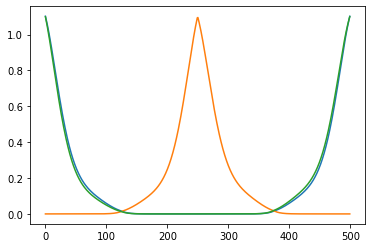

In [4]:
plt.plot((model.get_thetahat_dist(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[0, ...])
plt.plot((model.get_thetahat_dist(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[50, ...])
plt.plot((model.get_thetahat_dist(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[99, ...])

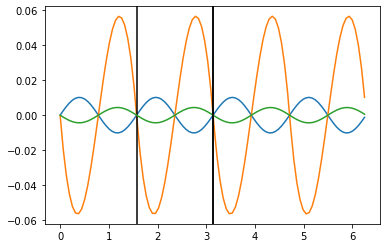

In [5]:
E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.5, 0.01)
plt.plot(theta0, theta0 - E_theta_given_theta0)

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.01, 0.05)
plt.plot(theta0, theta0 - E_theta_given_theta0)
plt.axvline(np.pi, c='k')
plt.axvline(0.5*np.pi, c='k')


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.75, 0.05)
plt.plot(theta0, theta0 - E_theta_given_theta0)
plt.axvline(np.pi, c='k')

In [6]:
x_stim = np.array(model.stim_grid)
p_stim = model.get_thetahat_dist(theta0, sigma_stim = 0.05*np.pi, sigma_rep = 0.01)
dx = x_stim[..., 1:] - x_stim[..., :-1]
x_value = model.value_function1(x_stim[:-1] + dx / 2.)

ps = []

np.shape(x_value)

(499,)

In [7]:
p_mass = ((p_stim[..., 1:] + p_stim[..., :-1]) / 2) * dx
np.shape(p_mass)


(100, 499)

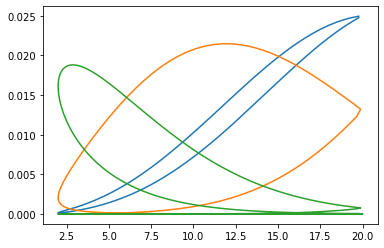

In [8]:
plt.plot(x_value, p_mass[99,:])
plt.plot(x_value, p_mass[79,:])
plt.plot(x_value, p_mass[85,:])

In [9]:
len(p_stim)

100

In [10]:
np.shape(p_mass[1])

(499,)

In [11]:
for ix in range(len(p_stim)):
    h, edges = np.histogram(x_value, bins=20, weights=p_mass[ix], density=True)
    ps.append(h)

ps = np.array(ps)
bin_centers = (edges[1:] + edges[:-1]) / 2

In [12]:
np.shape(ps)

(100, 20)

In [13]:
bin_centers

array([ 2.45008695,  3.35008249,  4.25007803,  5.15007358,  6.05006912,
        6.95006466,  7.8500602 ,  8.75005574,  9.65005128, 10.55004682,
       11.45004236, 12.3500379 , 13.25003344, 14.15002898, 15.05002453,
       15.95002007, 16.85001561, 17.75001115, 18.65000669, 19.55000223])

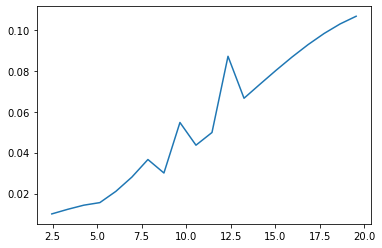

In [14]:
plt.plot(bin_centers,ps[1,:])

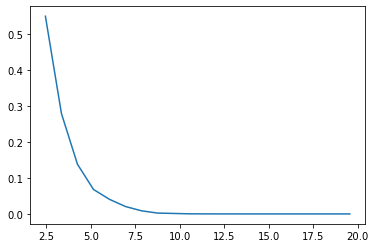

In [28]:
theta0 = 0.2*np.pi
sigma_stim = 0.001*np.pi
sigma_rep = 0.01
p_stim = model.get_thetahat_dist(theta0, sigma_stim, sigma_rep)
p_mass = ((p_stim[..., 1:] + p_stim[..., :-1]) / 2) * dx
bins = 20
ps = []
for ix in range(len(p_stim)):
    h, edges = np.histogram(x_value, bins=bins, weights=p_mass[ix], density=True)
    ps.append(h)

ps = np.squeeze(np.array(ps))
bin_centers = np.squeeze((edges[1:] + edges[:-1]) / 2)

(np.shape(p_stim))
plt.plot(bin_centers, ps)

In [16]:

theta0 = 0.5*np.pi
sigma_stim = 0.001*np.pi
sigma_rep = 0.01
v = model.get_value_dist(theta0, sigma_stim, sigma_rep, value_function = model.value_function1, bins=np.linspace(0, 20, 10), slow=True)
# plt.plot(v[0],v[1])

In [17]:
value_function = model.value_function1
value_function

<function riskModel.value_function1(x)>

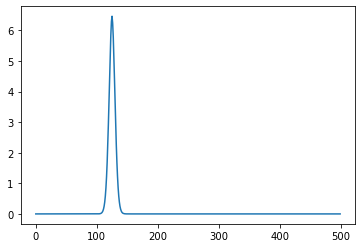

In [18]:
plt.plot((model.get_thetahat_dist(theta0 ,sigma_stim, sigma_rep))[0, ...])

In [67]:
v = model.get_value_dist(0.5*np.pi, sigma_stim, sigma_rep , model.value_function1, bins=1000)

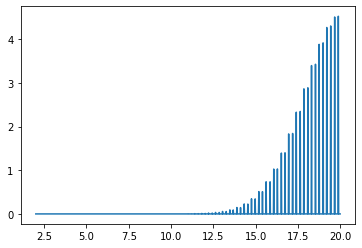

In [68]:
plt.plot(v[0],v[1][0,:])